<a href="https://colab.research.google.com/github/solobt777/Python_solobt777/blob/main/Week-5-DataScience/Univariate/percentile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("Placement.csv")
dataset.head()

In [ ]:
# find how many nan values are there in each column
dataset.isna().sum()
# fill is nan values with mean of that column
dataset['salary'].fillna(dataset['salary'].mean(), inplace=True)

In [5]:
from Univariate import Univariate

quant, qual = Univariate(dataset).quanQual()

print(quant)
print(qual)

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [ ]:
dataset.describe()

In [6]:
descriptive = pd.DataFrame(index=["Mean","Median", "Mode", "Q1-25%", "Q2-50%", "Q3-75%","99%",
                                  "Q4-100%","IQR","1.5rule","Lesser","Greater","Min","Max",
                                  "IsOutLierFound_LesserFence","IsOutLierFound_GreaterFence"], columns=quant)
for column in descriptive.columns:
    descriptive.loc["Mean", column] = dataset[column].mean()
    descriptive.loc["Median", column] = dataset[column].median()
    descriptive.loc["Mode", column] = dataset[column].mode()[0]
    descriptive.loc["Q1-25%", column] = dataset[column].quantile(0.25)
    descriptive.loc["Q2-50%", column] = dataset[column].quantile(0.50)
    descriptive.loc["Q3-75%", column] = dataset[column].quantile(0.75)
    descriptive.loc["99%", column] = dataset[column].quantile(0.99)
    descriptive.loc["Q4-100%", column] = dataset[column].quantile(1.00)
    descriptive.loc["IQR", column] = descriptive.loc["Q3-75%", column] - descriptive.loc["Q1-25%", column]
    descriptive.loc["1.5rule", column] = 1.5 * descriptive.loc["IQR", column]
    descriptive.loc["Lesser", column] = descriptive.loc["Q1-25%", column] - descriptive.loc["1.5rule", column]
    descriptive.loc["Greater", column] = descriptive.loc["Q3-75%", column] + descriptive.loc["1.5rule", column]
    descriptive.loc["Min", column] = dataset[column].min()
    descriptive.loc["Max", column] = dataset[column].max()
    descriptive.loc["IsOutLierFound_LesserFence", column] = dataset[column].min() < descriptive.loc["Lesser", column]
    descriptive.loc["IsOutLierFound_GreaterFence", column] = dataset[column].max() > descriptive.loc["Greater", column]

descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
Median,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Mode,1,62.0,63.0,65.0,60.0,56.7,300000.0
Q1-25%,54.5,60.6,60.9,61.0,60.0,57.945,240000.0
Q2-50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Q3-75%,161.5,75.7,73.0,72.0,83.5,66.255,300000.0
99%,212.86,87.0,91.86,83.86,97.0,76.1142,671200.0
Q4-100%,215.0,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,107.0,15.1,12.1,11.0,23.5,8.31,60000.0
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000.0


In [7]:
descriptive = pd.DataFrame(index=["Mean","Median", "Mode", "Q1-25%", "Q2-50%", "Q3-75%","99%",
                                      "Q4-100%","IQR","1.5rule","Lesser","Greater","Min","Max",
                                      "IsOutLierFound_LesserFence","IsOutLierFound_GreaterFence","skew","kurtosis"], columns=quant)

def Univariate(dataset, descriptive=descriptive):
    
    for column in descriptive.columns:
        descriptive.loc["Mean", column] = dataset[column].mean()
        descriptive.loc["Median", column] = dataset[column].median()
        descriptive.loc["Mode", column] = dataset[column].mode()[0] # getting first mode value
        descriptive.loc["Q1-25%", column] = dataset[column].quantile(0.25) # 25th percentile formula 25/100*(N+1)
        descriptive.loc["Q2-50%", column] = dataset[column].quantile(0.50)  # 50th percentile formula 50/100*(N+1)
        descriptive.loc["Q3-75%", column] = dataset[column].quantile(0.75) # 75th percentile formula 75/100*(N+1)
        descriptive.loc["99%", column] = dataset[column].quantile(0.99) # 99th percentile formula 99/100*(N+1)
        descriptive.loc["Q4-100%", column] = dataset[column].quantile(1.00) # 100th percentile formula k/100*(N+1)
        descriptive.loc["IQR", column] = descriptive.loc["Q3-75%", column] - descriptive.loc["Q1-25%", column]
        descriptive.loc["1.5rule", column] = 1.5 * descriptive.loc["IQR", column]
        descriptive.loc["Lesser", column] = descriptive.loc["Q1-25%", column] - descriptive.loc["1.5rule", column]
        descriptive.loc["Greater", column] = descriptive.loc["Q3-75%", column] + descriptive.loc["1.5rule", column]
        descriptive.loc["Min", column] = dataset[column].min()
        descriptive.loc["Max", column] = dataset[column].max()
        descriptive.loc["IsOutLierFound_LesserFence", column] = dataset[column].min() < descriptive.loc["Lesser", column]
        descriptive.loc["IsOutLierFound_GreaterFence", column] = dataset[column].max() > descriptive.loc["Greater", column]
        descriptive.loc["skew", column] = dataset[column].skew()
        descriptive.loc["kurtosis", column] = dataset[column].kurtosis()
    return descriptive

In [8]:
Univariate(dataset, descriptive)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
Median,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Mode,1,62.0,63.0,65.0,60.0,56.7,300000.0
Q1-25%,54.5,60.6,60.9,61.0,60.0,57.945,240000.0
Q2-50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Q3-75%,161.5,75.7,73.0,72.0,83.5,66.255,300000.0
99%,212.86,87.0,91.86,83.86,97.0,76.1142,671200.0
Q4-100%,215.0,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,107.0,15.1,12.1,11.0,23.5,8.31,60000.0
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000.0


## made one simple example to see the skness visually and it's score

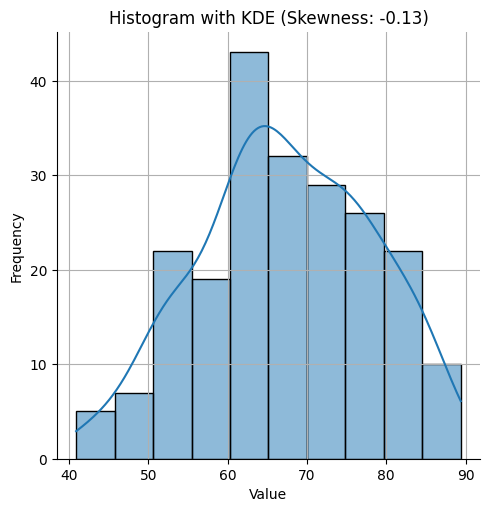

np.float64(-0.13264949031456927)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew



sns.displot(dataset.ssc_p, kde=True)
plt.title(f'Histogram with KDE (Skewness: {skew(dataset.ssc_p):.2f})')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## skewness score
dataset.ssc_p.skew()

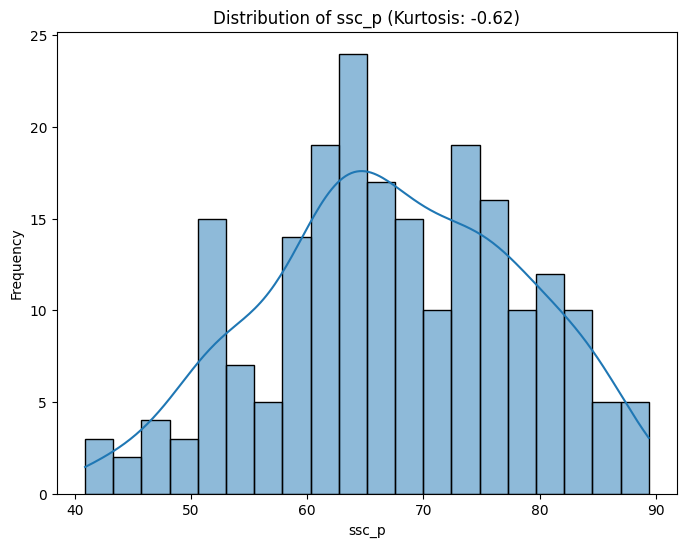

np.float64(-0.6075102066986688)

In [11]:
from scipy.stats import kurtosis
kurt_value = kurtosis(dataset.ssc_p)
plt.figure(figsize=(8, 6))
sns.histplot(dataset.ssc_p, kde=True, bins=20)
plt.title(f'Distribution of ssc_p (Kurtosis: {kurt_value:.2f})')
plt.xlabel('ssc_p')
plt.ylabel('Frequency')
plt.show()

dataset.ssc_p.kurtosis()